# Multimodal multivariate Gaussian

We can create a multimodal multivariate gaussian using [MultimodalGaussianLogPDF](http://pints.readthedocs.io/en/latest/toy/multimodal_gaussian_logpdf.html). By default, this has the distribution

$$ p(\boldsymbol{x}) \propto \mathcal{N}\left(\boldsymbol{x}\;\lvert\;\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1\right) + \mathcal{N}\left(\boldsymbol{x}\;\lvert\;\boldsymbol{\mu}_2, \boldsymbol{\Sigma}_2\right),$$

where, $\boldsymbol{\mu}_1 = (0,0)$ and $\boldsymbol{\mu}_2 = (10,10)$ and $\boldsymbol{\Sigma}_1$ and $\boldsymbol{\Sigma}_2$ are diagonal correlation matrices.

Plotting this pdf:

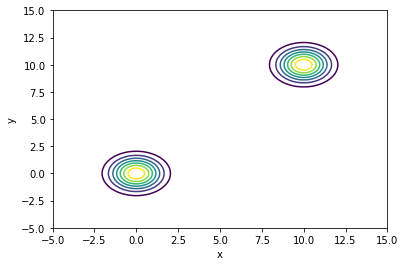

In [1]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.MultimodalGaussianLogPDF()

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Use adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [2]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


Scatter plot of the samples. Adaptive covariance MCMC does ok if we start the chains between the modes.

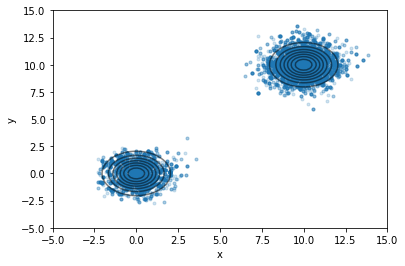

In [3]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

But if we start the chains at one of the modes, it can fail to find the other:

In [4]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([-0.1, -0.1], [0.1, 0.1], size=(4, 2))
mcmc = pints.MCMCController(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


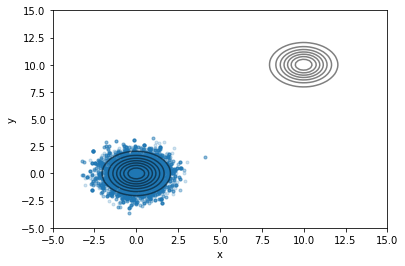

In [5]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors ='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha = 0.2)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()